In [ ]:
# install prerequisites for nle
!sudo apt-get install -y build-essential autoconf libtool pkg-config \
    python3-dev python3-pip python3-numpy git libncurses5-dev \
    libzmq3-dev flex bison

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
pkg-config is already the newest version (0.29.1-0ubuntu2).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libncurses5-dev is already the newest version (6.1-1ubuntu1.18.04).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
libzmq3-dev is already the newest version (4.2.5-1ubuntu0.2).
The following additional packages will be installed:
  automake autotools-dev file libbison-dev libfl-dev libfl2 libmagic-mgc
  libmagic1 libsigsegv2 m4 python-pip-whl python3-asn1crypto
  python3-cffi-backend python3-crypto python3-cryptography python3-idna
  python3-keyring python3-keyrings.alt python3-pkg-resources
  python3-secretstorage python3-setuptools python3-six python3-wheel
  python3-xdg
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext bison-doc flex-doc
  

In [ ]:
# download, build and install flatbuffers

!git clone https://github.com/google/flatbuffers.git
# all these commands have to be run in the same directory and !cd doesn't change
# the directory permanently in colab see: 
# https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter
!cd flatbuffers && cmake -G "Unix Makefiles" && make && sudo make install


Cloning into 'flatbuffers'...
remote: Enumerating objects: 23760, done.
remote: Counting objects: 100% (589/589), done.
remote: Compressing objects: 100% (317/317), done.
remote: Total 23760 (delta 294), reused 461 (delta 248), pack-reused 23171
Receiving objects: 100% (23760/23760), 15.00 MiB | 23.70 MiB/s, done.
Resolving deltas: 100% (16559/16559), done.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for strtof_l
-- Looking for strtof_

In [ ]:
!pip install cmake==3.15.3

     |████████████████████████████████| 16.5 MB 173 kB/s 
  Attempting uninstall: cmake
    Found existing installation: cmake 3.12.0
    Uninstalling cmake-3.12.0:
      Successfully uninstalled cmake-3.12.0


In [ ]:
!pip install nle==0.5.2

     |████████████████████████████████| 6.7 MB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pybind11-2.8.1-py2.py3-none-any.whl (208 kB)
  Created wheel for nle: filename=nle-0.5.2-cp37-cp37m-linux_x86_64.whl size=2836739 sha256=224b6907c58d762cd1becf5e2c51344f2f239257a4a818fe86a4fcac94ea69a8
  Stored in directory: /root/.cache/pip/wheels/97/ea/38/43e11ec23351270eda558a35665f4140e71b2295b0c901c0ab
Successfully built nle


In [ ]:
!pip install "nle[agent]"

In [ ]:
!pip install pyvirtualdisplay

In [ ]:
!pip install minihack

     |████████████████████████████████| 259 kB 5.2 MB/s 
     |████████████████████████████████| 6.8 MB 18.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for nle: filename=nle-0.7.3-cp37-cp37m-linux_x86_64.whl size=2874646 sha256=e9e94a000aafa857ca6ee6a240c5d1be60c22538162e8a712aba53ccbe9c3103
  Stored in directory: /root/.cache/pip/wheels/25/9a/cc/5df4c522352fb289d67b08b16cbb28b2131d982798343e681f
Successfully built nle
  Attempting uninstall: nle
    Found existing installation: nle 0.5.2
    Uninstalling nle-0.5.2:
      Successfully uninstalled nle-0.5.2


In [ ]:
!pip install torch

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import minihack
import math
import glob
import io
import os
import base64
import cv2
from IPython.display import HTML
from minihack import RewardManager

from IPython import display as ipythondisplay


from nle import nethack

from pyvirtualdisplay import Display
from collections import defaultdict


from tqdm import tqdm
import torch
import torch.nn.functional as F
from collections import namedtuple, deque
from torch import nn

In [ ]:
reward_manager = RewardManager()
reward_manager.add_kill_event("minotaur", reward=5, repeatable=False) # killing monster 


env = gym.make(
    "MiniHack-Quest-Hard-v0", 
    observation_keys=("glyphs", "chars", "colors", "pixel", "pixel_crop", "blstats", "colors_crop"),
    reward_manager=reward_manager, savedir="/content/gdrive/MyDrive/Colab Notebooks/VideosLA/"
)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
for i,a in enumerate(env._actions):
    print(f'action {i} is ',a, f' (=keypress {a})')

action 0 is  CompassDirection.N  (=keypress 107)
action 1 is  CompassDirection.E  (=keypress 108)
action 2 is  CompassDirection.S  (=keypress 106)
action 3 is  CompassDirection.W  (=keypress 104)
action 4 is  CompassDirection.NE  (=keypress 117)
action 5 is  CompassDirection.SE  (=keypress 110)
action 6 is  CompassDirection.SW  (=keypress 98)
action 7 is  CompassDirection.NW  (=keypress 121)
action 8 is  CompassDirectionLonger.N  (=keypress 75)
action 9 is  CompassDirectionLonger.E  (=keypress 76)
action 10 is  CompassDirectionLonger.S  (=keypress 74)
action 11 is  CompassDirectionLonger.W  (=keypress 72)
action 12 is  CompassDirectionLonger.NE  (=keypress 85)
action 13 is  CompassDirectionLonger.SE  (=keypress 78)
action 14 is  CompassDirectionLonger.SW  (=keypress 66)
action 15 is  CompassDirectionLonger.NW  (=keypress 89)
action 16 is  MiscDirection.DOWN  (=keypress 62)
action 17 is  MiscDirection.WAIT  (=keypress 46)
action 18 is  MiscAction.MORE  (=keypress 13)
action 19 is  Comma

In [ ]:
# Function that displays image
def display_img(image, colour = False):
    if colour:
        plt.figure()
        plt.imshow(image)
    else:
        plt.figure()
        plt.imshow(image, cmap = 'gray')

In [ ]:
#This
Transition = namedtuple('Transition',
                        ('state', 'state_extra_features', 'action', 'next_state', 'next_state_extra_features', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([],maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size): 
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [ ]:
#This
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

# Define model
class CNN(nn.Module):
    def __init__(self, h, w, outputs):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=1, stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=1, stride=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=1, stride=1)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 1, stride = 1):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32 + 12
        #mid_layer = int((linear_input_size+outputs)/2)
        #mid_layer = outputs
        mid_layer = 10
        self.head = nn.Linear(linear_input_size, outputs)
        #self.head = nn.Sequential(
        #    nn.Linear(linear_input_size, mid_layer),
        #    nn.ReLU(),
        #    nn.Linear(mid_layer, outputs),
    #        #nn.ReLU(),
    #        #nn.Linear(nn_layer_sizes[2], nn_layer_sizes[3])
        #)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x, y):
        x = x.to(device)
        #x2 = x[2,0,0:1]
        #x = x[0:2,:,:]
        #print(x.shape)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        #x = F.relu(self.conv1(x))
        #x = F.relu(self.conv2(x))
        #x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        #print('shape: ', x.shape)
        x = torch.cat((x,y),1)
        #print(x)
        return self.head(x)

Using cpu device


In [ ]:
class CNN2(nn.Module):
    def __init__(self, h, w, outputs):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=1, stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=1, stride=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, kernel_size=1, stride=1)
        self.bn3 = nn.BatchNorm2d(32)

        # Number of Linear input connections depends on output of conv2d layers
        # and therefore the input image size, so compute it.
        def conv2d_size_out(size, kernel_size = 1, stride = 1):
            return (size - (kernel_size - 1) - 1) // stride  + 1
        convw = conv2d_size_out(conv2d_size_out(conv2d_size_out(w)))
        convh = conv2d_size_out(conv2d_size_out(conv2d_size_out(h)))
        linear_input_size = convw * convh * 32 + 3
        #mid_layer = int((linear_input_size+outputs)/2)
        #mid_layer = outputs
        mid_layer = 10
        self.head = nn.Linear(linear_input_size, outputs)
        #self.head = nn.Sequential(
        #    nn.Linear(linear_input_size, mid_layer),
        #    nn.ReLU(),
        #    nn.Linear(mid_layer, outputs),
    #        #nn.ReLU(),
    #        #nn.Linear(nn_layer_sizes[2], nn_layer_sizes[3])
        #)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x, y):
        x = x.to(device)
        #x2 = x[2,0,0:1]
        #x = x[0:2,:,:]
        #print(x.shape)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        #x = F.relu(self.conv1(x))
        #x = F.relu(self.conv2(x))
        #x = F.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        #print('shape: ', x.shape)
        x = torch.cat((x,y),1)
        #print(x)
        return self.head(x)

In [ ]:
# Function to return a random number uniformly between low and high
def random_num(low, high):
    return random.uniform(low, high)

In [74]:
# Function to plot graphs of averaged rewards

def plot_graphs(matrix_of_all_y_values, legends):
    x_values = np.zeros(np.shape(matrix_of_all_y_values)[1])
    for i in range(np.shape(x_values)[0]):
        x_values[i] = i+1
    
    plt.figure(figsize = (6,6))
    for i in range(np.shape(matrix_of_all_y_values)[0]):
        # for current array of y_values
        plt.plot(x_values, matrix_of_all_y_values[i])
    
    plt.legend(legends)
    plt.xlabel("Time Step")
    plt.ylabel("Average Reward")
    
    plt.show()

In [ ]:
def update_visited_matrix(vis_mat, curr_pos):
    vis_mat = vis_mat + 1.0
    vis_mat[curr_pos[0]][curr_pos[1]] = 0.0
    for i in range(29, 79):
        vis_mat[3][i] = 0.0
        vis_mat[19][i] = 0.0
    return vis_mat

In [ ]:
def get_visited_matrix_patch(visited_mat, curr_pos, size):
    start_row_ind = curr_pos[0] - int(size/2) # inclusive
    end_row_ind = curr_pos[0] + int(size/2) + 1 # exclusive
    start_col_ind = curr_pos[1] - int(size/2) # inclusive
    end_col_ind = curr_pos[1] + int(size/2) + 1 # exclusive
    vm_shape = np.shape(visited_mat)

    visited_mat_patch = np.zeros((size, size))
    
    for row_ind in range(max(0, start_row_ind), min(vm_shape[0], end_row_ind)):
        for col_ind in range(max(0, start_col_ind), min(vm_shape[1], end_col_ind)):
            patch_row_ind = row_ind - start_row_ind
            patch_col_ind = col_ind - start_col_ind
            visited_mat_patch[patch_row_ind][patch_col_ind] = min(1000.0, visited_mat[row_ind][col_ind])

    return visited_mat_patch


In [ ]:
def get_info_about_adjacent_cells(visited_matrix, curr_pos):
    min_adj_val = 200
    min_adj_ind = -1
    min_adj_pos = [-1, -1]
    adj_cell_info = np.zeros(12)

    count = 0
    for i in range(2):
        for j in range(2):
            curr_adj_pos = [curr_pos[0], curr_pos[1]]
            plus_or_minus = 1
            if j == 0:
                plus_or_minus = -1
            
            curr_adj_pos[i] = curr_adj_pos[i]+plus_or_minus

            #Check if the pos is out of bounds
            if curr_adj_pos[0] < 0 or curr_adj_pos[1] < 0 or curr_adj_pos[0] >= 21 or curr_adj_pos[1] >= 79:
                continue

            curr_adj_val = min(200, visited_matrix[curr_adj_pos[0]][curr_adj_pos[1]])
            #print(curr_adj_pos, curr_adj_val)
            
            if curr_adj_val == 200: # Then it is unvisited
                adj_cell_info[count] = 1.0
            elif curr_adj_val < min_adj_val: # Then it is visited
                min_adj_val = curr_adj_val
                min_adj_ind = count
                min_adj_pos = curr_adj_pos
          
            adj_cell_info[count+8] = curr_adj_val/200.0
            count+=1
            
    #print('')
    if min_adj_ind != -1:
        adj_cell_info[min_adj_ind+4] = 1.0

    return adj_cell_info, min_adj_pos

In [ ]:
def get_state_input_for_model(obs, print_vals = False):
    state_input = obs['colors_crop'][3:6,3:6]
    
    state_input_rearange = np.array(state_input)
    
    state_input_rearange = torch.from_numpy(state_input_rearange).to(device).float().unsqueeze(0)

    return state_input_rearange
    

In [ ]:
def get_state_input_for_model2(obs):
    state_input = obs['colors_crop']
    #print(state_input, np.shape(state_input))
    state_input_rearange = np.array(state_input)
    state_input_rearange = torch.from_numpy(state_input_rearange).to(device).float().unsqueeze(0)
    return state_input_rearange

In [ ]:
def get_state_extra_feature_info(curr_observations, tot_num_steps, curr_max_x, visited_matrix):#visited_matrix, size):
    
    extra_feature_info = np.array([tot_num_steps/1000.0, curr_observations['blstats'][0], curr_observations['blstats'][1], curr_max_x])

    adj_cell_info, recent_vis_cell = get_info_about_adjacent_cells(visited_matrix, (curr_observations['blstats'][1], curr_observations['blstats'][0]))

    extra_feature_info = np.append(extra_feature_info, adj_cell_info)

    return adj_cell_info, recent_vis_cell
    return extra_feature_info, recent_vis_cell

In [ ]:
def get_state_extra_feature_info2(curr_observations, tot_num_steps, curr_max_x):
    extra_feature_info = np.array([curr_observations['blstats'][0], curr_observations['blstats'][1], curr_max_x])
    return extra_feature_info

In [ ]:
def format_observations(observation,visited_count_map, keys=("colors_crop", "blstats")):
    observations = {}
    entry = observation["colors_crop"]
    entry = torch.from_numpy(entry)
    entry = entry.view((1, 1) + entry.shape)  # (...) -> (T,B,...).
    observations["colors_crop"] = entry

    adj_cell_info, recent_vis_cell = get_info_about_adjacent_cells(visited_count_map, (observation['blstats'][1], observation['blstats'][0]))
    adj_cell_info = torch.from_numpy(adj_cell_info)
    observations["blstats"] = adj_cell_info
    return observations, recent_vis_cell

In [ ]:
# Apply sliding window average to list of rewards
def averaged_rewards_with_sliding_window(rewards):
    sliding_window_size = 5
    sliding_window_rewards = np.zeros(np.shape(rewards)[0])
    
    for i in range(np.shape(rewards)[0]):
        sliding_window_rewards[i] = np.mean(rewards[max(0, i-sliding_window_size):i+1])
        
    return sliding_window_rewards


In [ ]:
def epsilon_greedy_policy(action_vals, epsilon):
    if random_num(0, 1) < epsilon: # Then take random action
        return int(random_num(0, len(action_vals)))
    else: # Take greedy action
        return torch.argmax(action_vals)

In [ ]:
def print_game_info(curr_obs, action, reward, episode):
  if reward == 3:
    print('Got reward')
    print(curr_obs['blstats'])

  if episode != -1:
    return
  print(action, reward)
  display_img(curr_obs['pixel'], colour = True) # [36:108,36:108,:]

In [69]:
def get_normalised_array(np_arr):
    normalised_arr = np.zeros(len(np_arr))
    max_val_in_arr = np_arr.max()*1.0
    min_val_in_arr = np_arr.min()*1.0
    for i in range(len(np_arr)):
        normalised_arr[i] = (np_arr[i]-min_val_in_arr)/(max_val_in_arr - min_val_in_arr)

    return normalised_arr

In [ ]:
#This
BATCH_SIZE = 1
TARGET_UPDATE = 5000
REPLAY_MEM_SIZE = 5000
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
LIMITED_ACTION_CHANGE = 50
RANDOM_AGENT = False


def learn_model(model, target_net, model2, target_net2, env, num_episodes, gamma, epsilon, l_r, action_list):
    # Setup model for training
    model.train()
    model2.train()
    
    # Setup memory
    memory = ReplayMemory(REPLAY_MEM_SIZE)
    memory2 = ReplayMemory(REPLAY_MEM_SIZE)
    
    # Setup loss function and optimizer
    torch.autograd.set_detect_anomaly(False)
    #loss_fn = nn.CrossEntropyLoss()
    #loss_fn = nn.L1Loss()
    loss_fn = nn.SmoothL1Loss()
    #optimizer = torch.optim.Adam(model.parameters(), lr=l_r)
    optimizer = torch.optim.SGD(model.parameters(), lr=l_r)
    #optimizer = torch.optim.RMSprop(model.parameters())
    
    found_cell_after_maze_count = 0.0
    found_cell_after_lava_count = 0.0
    found_cell_by_stairs_count = 0.0
    killed_monster_count = 0.0

    all_acc_rewards = []
    tot_num_steps = 0 
    tot_num_steps2 = 0 
    for i in range(num_episodes):
        acc_reward = 0.0
        curr_observations = env.reset()

        visited_count_map = np.full((21, 79), 200.0)
        visited_count_map = update_visited_matrix(visited_count_map, (curr_observations['blstats'][1], curr_observations['blstats'][0]))
        visited_map = np.full((21, 79), False)

        found_cell_after_maze = False
        just_found_cell_after_maze = False
        found_cell_after_lava = False
        found_cell_by_stairs = False
        

        max_x_dist_reached = curr_observations['blstats'][0]
        max_x_dist_reached_actual = curr_observations['blstats'][0]
        max_x_dist_reached_count = 0.0
        visited_count = 0.0
        
        # Get initial action-values for first state
        state = get_state_input_for_model(curr_observations).unsqueeze(0)
        state_extra_features_np, recent_visit_cell = get_state_extra_feature_info(curr_observations, tot_num_steps, max_x_dist_reached, visited_count_map)
        state_extra_features = torch.from_numpy(state_extra_features_np).to(device).float().unsqueeze(0)
        #print(state_extra_features, len(state_extra_features[0]))
        done = False
        
        #TESTING
        #print('initial')
        #display_img(curr_observations['pixel'], colour = True)
        first_step_of_episode = True

        # Running single episode
        while not done:

            # For a step in the episode, need to learn from this current state 
            # First what is needed to learn from a state
            # Need all action-values from this state, need action, need reward for action, need next state and next state
            # action values and need next state best_action_value
            
            pred_action_vals = []
            with torch.no_grad():
                #print(state.shape)
                if not found_cell_after_maze:
                    pred_action_vals = model(state, state_extra_features)
                else:
                    pred_action_vals = model2(state, state_extra_features)
            
            
            # FOr testing the different states
            #print("pred_action_vals:", pred_action_vals)
            if first_step_of_episode:
                first_step_of_episode = False
                #display_img(curr_observations['pixel_crop'], colour = True)
            else:
                fffff = 2
                #display_img(curr_observations[0]['pixel'], colour = True)

            #epsilon = EPS_END + (EPS_START - EPS_END) * \
            #    math.exp(-1. * steps_done / EPS_DECAY)            

            #if i<LIMITED_ACTION_CHANGE:
            #    curr_action = epsilon_greedy_policy(pred_action_vals[0][0:4], epsilon)
            #else:
                #curr_action = epsilon_greedy_policy(pred_action_vals[0], epsilon)
            if not found_cell_after_maze and i>=40 and not RANDOM_AGENT:
                curr_action = epsilon_greedy_policy(pred_action_vals[0], 0.05)
            else:
                curr_action = epsilon_greedy_policy(pred_action_vals[0], epsilon)

            curr_action_env_ind = action_list[curr_action]
            curr_observations = env.step(curr_action_env_ind)
            curr_reward = curr_observations[1]
            done = curr_observations[2]

            # This is basic reward setup for testing different states 
            #if curr_reward == -0.01:
            #    curr_reward = -0.7
            if not found_cell_after_maze:
                # THis stuff is for the new idea of going to unexplored blocks and not going to recently visited blocks
                if done:
                    curr_reward = 0.0 
                if curr_reward == -0.01:
                    curr_reward = -0.7
                elif visited_count_map[curr_observations[0]['blstats'][1]][curr_observations[0]['blstats'][0]] >= 200.0:# Then new pos is unvisited
                    curr_reward = 1.0
                    visited_count += 1.0
                elif curr_observations[0]['blstats'][1] == recent_visit_cell[0] and curr_observations[0]['blstats'][0] == recent_visit_cell[1]:
                    # Then visiting the most recently visited cell
                    curr_reward = -0.3
                    # x co-ord

                if curr_observations[0]['blstats'][0] == 27 and curr_observations[0]['blstats'][1] == 11 and not found_cell_after_maze:
                    #curr_reward += 20.0
                    found_cell_after_maze = True
                    just_found_cell_after_maze = True
                    found_cell_after_maze_count += 1.0
                    #done = True
                    print('Finished Maze!')
            else: # Then its not the maze so set up the reward and counts for model 2 
                if curr_reward == 5:
                    killed_monster_count += 1.0
                    print("Killed Monster!")

                if done:
                    curr_reward = 0.0 
                if curr_observations[0]['blstats'][0] > max_x_dist_reached:# and curr_observations[0]['blstats'][1]>=10 and curr_observations[0]['blstats'][1]<=12:
                #curr_reward += float(curr_observations[0]['blstats'][0] - max_x_dist_reached)
                    curr_reward += 1.0
                    max_x_dist_reached = curr_observations[0]['blstats'][0]

                if curr_observations[0]['blstats'][0] == 52 and curr_observations[0]['blstats'][1] == 11 and not found_cell_after_lava:
                    curr_reward += 5.0
                    found_cell_after_lava = True
                    print("CROSSED LAVA!")
                    found_cell_after_lava_count += 1.0
                elif curr_observations[0]['blstats'][0] == 72 and curr_observations[0]['blstats'][1] == 11 and not found_cell_by_stairs:
                    curr_reward += 5.0
                    found_cell_by_stairs = True
                    print("STAIRS!")
                    found_cell_by_stairs_count += 1.0


            
            if curr_observations[0]['blstats'][0] > max_x_dist_reached and curr_observations[0]['blstats'][1]>=10 and curr_observations[0]['blstats'][1]<=12:
                #curr_reward += float(curr_observations[0]['blstats'][0] - max_x_dist_reached)
                max_x_dist_reached = curr_observations[0]['blstats'][0]

                #if max_x_dist_reached>=26:
                #  print("Got to ", max_x_dist_reached, curr_observations[0]['blstats'][1])
                #max_x_dist_reached_count += 1/0

            #if curr_observations[0]['blstats'][0] > 26 and (curr_observations[0]['blstats'][1]==3 or curr_observations[0]['blstats'][1]==19):
                #curr_reward -= float(10.0)

            if curr_observations[0]['blstats'][0] >= max_x_dist_reached_actual:
                max_x_dist_reached_actual = curr_observations[0]['blstats'][0]

            # Rewards for going to unvisited places
            if not found_cell_after_maze:
                next_state_visited_value = min(200.0, visited_count_map[curr_observations[0]['blstats'][1]][curr_observations[0]['blstats'][0]])
                curr_reward += float(0.3*(next_state_visited_value/200.0))
            #print(curr_reward)

            print_game_info(curr_observations[0], curr_action_env_ind, curr_reward, i)
            #, done = env.take_action(curr_action)

            visited_count_map = update_visited_matrix(visited_count_map, (curr_observations[0]['blstats'][1], curr_observations[0]['blstats'][0]))
            
            curr_action = torch.tensor([[curr_action]], device = device)
            curr_reward = torch.tensor([curr_reward], device = device)
            
            next_state = None
            next_state_extra_features = None
            if not done: 
                if not found_cell_after_maze:
                    next_state = get_state_input_for_model(curr_observations[0]).unsqueeze(0)
                    #next_state_extra_features = torch.from_numpy(np.array(curr_observations[0]['blstats'])).to(device).float().unsqueeze(0)
                    #next_state_extra_features = torch.from_numpy(np.array([tot_num_steps/1000.0, curr_observations[0]['blstats'][0], curr_observations[0]['blstats'][1]])).to(device).float().unsqueeze(0)
                    next_state_extra_features_np, recent_visit_cell = get_state_extra_feature_info(curr_observations[0], tot_num_steps, max_x_dist_reached, visited_count_map)
                    next_state_extra_features = torch.from_numpy(next_state_extra_features_np).to(device).float().unsqueeze(0)
                else:
                    next_state = get_state_input_for_model2(curr_observations[0]).unsqueeze(0)
                    next_state_extra_features_np = get_state_extra_feature_info2(curr_observations[0], tot_num_steps2, max_x_dist_reached)
                    next_state_extra_features = torch.from_numpy(next_state_extra_features_np).to(device).float().unsqueeze(0)

            # Send info to memory
            if not found_cell_after_maze:
                memory.push(state, state_extra_features, curr_action, next_state, next_state_extra_features, curr_reward)
            elif not just_found_cell_after_maze:
                memory2.push(state, state_extra_features, curr_action, next_state, next_state_extra_features, curr_reward)
            
            #print(tot_num_steps,": ", state, curr_action, next_state, curr_reward)
            
            # Call the optimise function over here
            #if tot_num_steps == 5:
            if not found_cell_after_maze:
                BATCH_SIZE = 1
                optimise_model(model, target_net, memory, 0.0, l_r, optimizer, loss_fn)
            else:
                BATCH_SIZE = 64
                optimise_model(model2, target_net2, memory2, gamma, l_r, optimizer, loss_fn)
            
            # Then need to set values for next iteration
            state = next_state
            state_extra_features = next_state_extra_features
            just_found_cell_after_maze = False
            #pred_action_vals = pred_action_vals_next
            
            # Update target network if needed
            if not found_cell_after_maze:
                tot_num_steps += 1
                if tot_num_steps % TARGET_UPDATE == 0:
                    target_net.load_state_dict(model.state_dict())
            else:
                tot_num_steps2 += 1
                if tot_num_steps2 % TARGET_UPDATE == 0:
                    target_net2.load_state_dict(model2.state_dict())
            
            acc_reward += float(curr_reward[0])
            
        
        # Append accumulated rewards
        all_acc_rewards.append(acc_reward)
        if i%1 == 0:
            print('Mean: ', acc_reward, i*1.0/num_episodes, tot_num_steps, max_x_dist_reached_actual, visited_count) # np.mean(np.array(all_acc_rewards))
            #print('How far: ', np.mean(np.array(all_acc_rewards)), acc_reward, i*1.0/num_episodes)
            #display_img(canvas_img)
        
    return all_acc_rewards, np.array([found_cell_after_maze_count, found_cell_after_lava_count, found_cell_by_stairs_count, killed_monster_count])

In [ ]:
#This
def optimise_model(model, target_net, memory, gamma, l_r, optimizer, loss_fn):
    if len(memory) < BATCH_SIZE:
        return
    
    transitions = memory.sample(BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    #print("Batch next_state ", batch.next_state)
    
    
    #print("testing non-terminal states: ", [s for s in batch.next_state if s is not None] == [])
    next_state_values = torch.zeros(BATCH_SIZE, device=device)
    non_final_next_states_list = [s for s in batch.next_state if s is not None]
    if non_final_next_states_list != []:
        non_final_next_states = torch.cat([s for s in batch.next_state
                                                    if s is not None])
        non_final_next_states_extra = torch.cat([s for s in batch.next_state_extra_features
                                                    if s is not None])
        next_state_values[non_final_mask] = target_net(non_final_next_states, non_final_next_states_extra).max(1)[0].detach()
    
    
    #next_state_values = torch.zeros(BATCH_SIZE, device=device)
        
    state_batch = torch.cat(batch.state)
    state_extra_features_batch = torch.cat(batch.state_extra_features)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = model(state_batch, state_extra_features_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1)[0].
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    # Compute the expected Q values
    expected_state_action_values = (next_state_values * gamma) + reward_batch

    # Compute Huber loss
    loss = loss_fn(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
    

In [ ]:
action_ind_list =  [0,1,2,3,4,5,6,7,20,33,47,49,50,51,52,58,72,75]
#action_ind_list =  [0,1,2,3]
print(len(action_ind_list))

18


In [58]:
def get_avg_reward_for_multiple_runs():
    num_episodes = 200
    avged_rewards = np.zeros(num_episodes)
    all_counts = np.zeros(4)
    for i in range(1):
        model1 = CNN(3, 3, 4).to(device)
        target_net1 = CNN(3, 3, 4).to(device)
        target_net1.load_state_dict(model1.state_dict())
        target_net1.eval()

        model11 = CNN2(9, 9, 18).to(device)
        target_net11 = CNN2(9, 9, 18).to(device)
        target_net11.load_state_dict(model11.state_dict())
        target_net11.eval()

        
        acc_rew1, counts1 = learn_model(model1, target_net1, model11, target_net11, env, num_episodes, 0.999, 0.2, 0.001, action_ind_list)

        acc_rew_avg1 = averaged_rewards_with_sliding_window(acc_rew1)
        plot_graphs([acc_rew_avg1], ["0.001"])

        avged_rewards = avged_rewards + acc_rew1
        all_counts = all_counts + counts1
        print("Curr counts: ", counts1)

    avged_rewards = avged_rewards/1.0

    return avged_rewards, all_counts


Mean:  -318.1909980373457 0.0 1000 11 17.0
Mean:  -195.32999976724386 0.01 2000 10 27.0
Mean:  -169.79099977947772 0.02 3000 6 51.0
Mean:  -115.70550094265491 0.03 4000 11 43.0
Mean:  -106.2860022354871 0.04 5000 14 67.0
Mean:  -74.37350196577609 0.05 6000 14 72.0
Mean:  34.502995545975864 0.06 7000 26 119.0
Mean:  -2.607504579704255 0.07 8000 27 135.0
Mean:  -95.80250122118741 0.08 9000 27 74.0
Mean:  2.7599966218695045 0.09 10000 26 95.0
Mean:  49.73749621072784 0.1 11000 18 102.0
Mean:  -100.4860053670127 0.11 12000 76 77.0
Mean:  95.31749501870945 0.12 13000 20 131.0
Mean:  97.18999459734187 0.13 14000 20 139.0
Mean:  215.85699061769992 0.14 15000 24 214.0
Mean:  120.94149370025843 0.15 16000 12 157.0
Mean:  -63.138502972666174 0.16 17000 76 88.0
Mean:  173.04798843548633 0.17 18000 76 243.0
Mean:  145.62049299571663 0.18 19000 20 171.0
Mean:  227.71248959656805 0.19 20000 22 253.0
Mean:  135.78849372686818 0.2 21000 19 159.0
Mean:  103.46699523366988 0.21 22000 12 123.0
Finished M

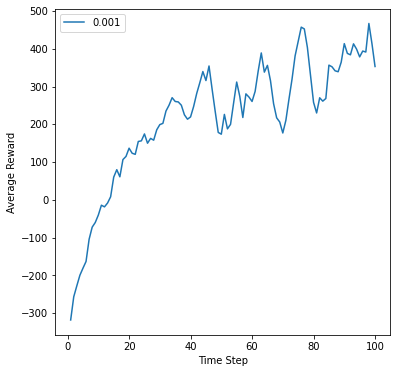

Curr counts:  [45.  0.  0.  0.]
Mean:  -371.0864976462908 0.0 1000 4 17.0
Mean:  -275.0924995234236 0.01 2000 9 15.0
Mean:  -218.40250079426914 0.02 3000 20 43.0
Mean:  -365.0444981644396 0.03 4000 76 55.0
Mean:  -127.17250108346343 0.04 5000 15 49.0
Mean:  -145.4824995654635 0.05 6000 12 12.0
Mean:  -199.67499980609864 0.06 7000 14 21.0
Mean:  -272.86250041332096 0.07 8000 20 34.0
Mean:  -185.85650019627064 0.08 9000 12 28.0
Mean:  -126.8510009655729 0.09 10000 8 41.0
Mean:  -53.196001910138875 0.1 11000 12 61.0
Mean:  -50.66750140534714 0.11 12000 27 67.0
Mean:  25.24649399286136 0.12 13000 76 129.0
Mean:  -52.28950366238132 0.13 14000 76 67.0
Mean:  -169.40000474452972 0.14 15000 76 26.0
Mean:  -124.17700351891108 0.15 16000 76 51.0
Finished Maze!
Mean:  61.75849728961475 0.16 16163 29 65.0
Mean:  -10.364001724403352 0.17 17163 20 56.0
Mean:  172.34699232131243 0.18 18163 28 189.0
Mean:  33.77699581021443 0.19 19163 16 124.0
Mean:  -9.14500295650214 0.2 20163 12 109.0
Mean:  -14.720

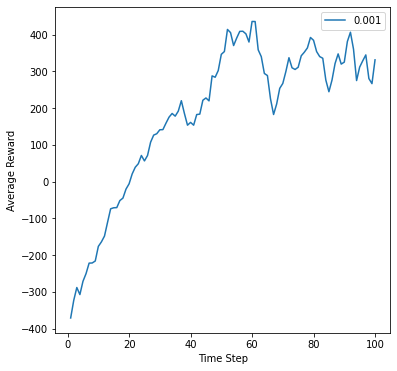

Curr counts:  [50.  0.  0.  0.]
Mean:  -367.25149727845564 0.0 1000 12 16.0
Mean:  -333.46249887533486 0.01 2000 4 8.0
Mean:  -270.84850002638996 0.02 3000 16 15.0
Mean:  -196.24400144070387 0.03 4000 14 50.0
Mean:  -106.66050198394805 0.04 5000 10 65.0
Mean:  -105.43050239700824 0.05 6000 20 67.0
Mean:  -107.87100284080952 0.06 7000 12 115.0
Mean:  -2.3130041379481554 0.07 8000 22 107.0
Mean:  77.06999348313548 0.08 9000 29 166.0
Mean:  -73.50950399506837 0.09 10000 76 100.0
Mean:  90.94849287252873 0.1 11000 29 177.0
Mean:  -11.171007882338017 0.11 12000 76 121.0
Mean:  101.04599345754832 0.12 13000 29 175.0
Mean:  -142.14800445758738 0.13 14000 76 51.0
Mean:  92.01199365337379 0.14 15000 28 178.0
Mean:  70.65249422006309 0.15 16000 20 148.0
Mean:  23.064995903056115 0.16 17000 20 132.0
Mean:  154.6719921727199 0.17 18000 28 191.0
Mean:  196.99149201088585 0.18 19000 29 187.0
Mean:  91.37999395630322 0.19 20000 29 154.0
Finished Maze!
Mean:  145.36849418422207 0.2 20543 28 136.0
Mean

/usr/local/lib/python3.7/dist-packages/nle/env/base.py:695: UserWarning: Warning: smooth quitting of game failed, aborting.
  warnings.warn("Warning: smooth quitting of game failed, aborting.")


Mean:  269.13998920144513 0.22 22491 29 245.0
Mean:  182.60999172460288 0.23 23491 28 196.0
Mean:  256.3769897897728 0.24 24491 22 233.0
Mean:  165.29099288838916 0.25 25491 29 174.0
Mean:  125.98049377813004 0.26 26491 28 157.0
Mean:  276.9269889376592 0.27 27491 28 257.0
Mean:  249.7169893863611 0.28 28491 28 241.0
Mean:  145.57999299792573 0.29 29491 28 172.0
Mean:  91.70349615998566 0.3 30491 12 104.0
Mean:  167.0729926151689 0.31 31491 64 178.0
Mean:  166.90249242028221 0.32 32491 16 187.0
Mean:  293.69898773846216 0.33 33491 28 284.0
Mean:  257.4219895657152 0.34 34491 16 242.0
Finished Maze!
Mean:  36.25199829763733 0.35 34626 29 42.0
Mean:  297.99948808108456 0.36 35626 28 274.0
Finished Maze!
Mean:  138.0474942198489 0.37 36180 28 137.0
Mean:  216.48149147210643 0.38 37180 19 204.0
Mean:  169.09699276881292 0.39 38180 29 175.0
Finished Maze!
Mean:  303.16198925487697 0.4 38662 28 231.0
Mean:  395.8584854817018 0.41 39662 28 311.0
Mean:  444.6064840746112 0.42 40662 28 343.0
Fi

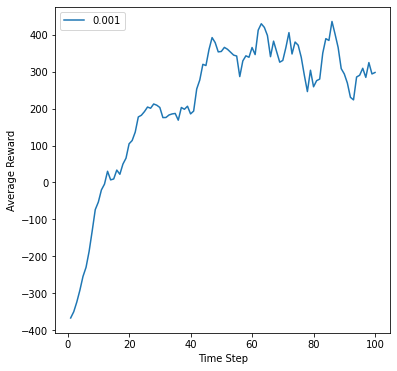

Curr counts:  [41.  0.  0.  0.]


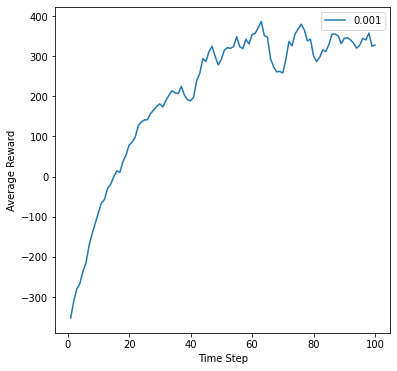

All counts: [136.   0.   0.   0.]


In [ ]:
avged_rewards1, all_counts1 = get_avg_reward_for_multiple_runs()
acc_rew_avg1 = averaged_rewards_with_sliding_window(avged_rewards1)
plot_graphs([acc_rew_avg1], ["0.001"])
print("All counts:", all_counts1)

Mean:  -359.3429962177761 0.0 1000 10 56.0
Mean:  -342.2319964924827 0.01 2000 22 57.0
Mean:  -358.5409959149547 0.02 3000 25 42.0
Mean:  -325.4749972447753 0.03 4000 8 63.0
Mean:  -375.93849547440186 0.04 5000 4 35.0
Mean:  -324.41849688533694 0.05 6000 8 51.0
Mean:  -359.9299959987402 0.06 7000 20 45.0
Mean:  -323.5094968499616 0.07 8000 14 56.0
Mean:  -354.9324959218502 0.08 9000 5 37.0
Mean:  -359.2659957758151 0.09 10000 10 41.0
Mean:  -329.96799717331305 0.1 11000 14 61.0
Mean:  -329.9224967022892 0.11 12000 28 60.0
Mean:  -334.47899684123695 0.12 13000 16 49.0
Mean:  -353.63799645146355 0.13 14000 18 54.0
Mean:  -355.7719961893745 0.14 15000 10 52.0
Mean:  -340.75899666780606 0.15 16000 16 58.0
Mean:  -355.0454965769313 0.16 17000 18 57.0
Mean:  -328.0579968378879 0.17 18000 16 60.0
Mean:  -346.33349631680176 0.18 19000 6 48.0
Mean:  -332.4439968634397 0.19 20000 15 61.0
Mean:  -364.92649573320523 0.2 21000 24 41.0
Mean:  -337.2319962126203 0.21 22000 13 37.0
Mean:  -343.0449966

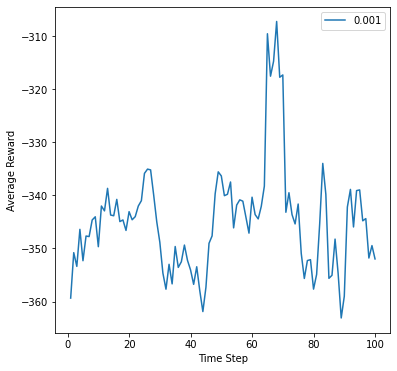

Curr counts:  [1. 0. 0. 0.]
Mean:  -382.3669950780459 0.0 1000 12 35.0
Mean:  -368.85099589731544 0.01 2000 6 43.0
Mean:  -363.6004958162084 0.02 3000 14 32.0
Mean:  -302.28549808450043 0.03 4000 18 83.0
Mean:  -349.89499602420256 0.04 5000 13 42.0
Mean:  -347.6634963247925 0.05 6000 17 50.0
Mean:  -349.23499634629115 0.06 7000 13 63.0
Mean:  -295.0984979015775 0.07 8000 21 76.0
Mean:  -351.4944960428402 0.08 9000 10 41.0
Mean:  -361.05949597945437 0.09 10000 14 51.0
Finished Maze!
Mean:  -44.1499998238869 0.1 10153 27 19.0
Mean:  -358.82249649986625 0.11 11153 24 59.0
Mean:  -345.7604964901693 0.12 12153 7 61.0
Mean:  -325.3504968811758 0.13 13153 19 59.0
Mean:  -341.4299966166727 0.14 14153 10 55.0
Mean:  -368.67049592593685 0.15 15153 20 44.0
Mean:  -331.6429968671873 0.16 16153 10 59.0
Mean:  -377.3214955860749 0.17 17153 14 36.0
Mean:  -371.8939953837544 0.18 18153 12 35.0
Mean:  -358.7379959952086 0.19 19153 10 45.0
Mean:  -360.7419962720014 0.2 20153 12 52.0
Mean:  -345.62999663

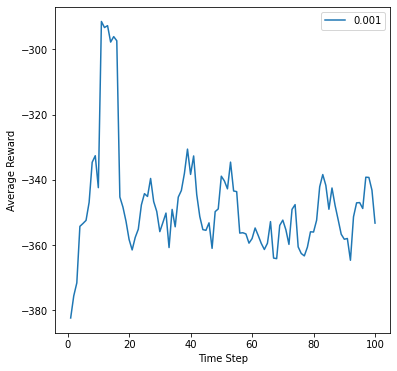

Curr counts:  [1. 0. 0. 0.]
Mean:  -323.81749712117016 0.0 1000 26 57.0
Mean:  -357.24449602654204 0.01 2000 16 43.0
Mean:  -339.32649641577154 0.02 3000 25 45.0
Mean:  -344.7519964198582 0.03 4000 12 44.0
Mean:  -328.6644966909662 0.04 5000 14 54.0
Mean:  -354.40449624788016 0.05 6000 12 51.0
Mean:  -350.9854963729158 0.06 7000 14 50.0
Mean:  -348.77849626960233 0.07 8000 16 57.0
Mean:  -380.9359952090308 0.08 9000 16 32.0
Mean:  -349.43099656840786 0.09 10000 8 54.0
Mean:  -392.8519952907227 0.1 11000 10 42.0
Mean:  -347.86099627939984 0.11 12000 10 55.0
Mean:  -349.9839969407767 0.12 13000 10 61.0
Mean:  -375.13599533587694 0.13 14000 10 32.0
Mean:  -344.372996551916 0.14 15000 18 62.0
Mean:  -331.0389968769159 0.15 16000 28 60.0
Mean:  -370.5704954843968 0.16 17000 8 41.0
Mean:  -335.49899681983516 0.17 18000 16 57.0
Mean:  -359.40399617003277 0.18 19000 18 47.0
Mean:  -364.58099576691166 0.19 20000 14 36.0
Mean:  -353.2709960988723 0.2 21000 12 44.0
Mean:  -375.17549525015056 0.21

In [ ]:
avged_rewards2, all_counts2 = get_avg_reward_for_multiple_runs()
acc_rew_avg2 = averaged_rewards_with_sliding_window(avged_rewards2)
plot_graphs([acc_rew_avg2], ["0.001"])
print("All counts:", all_counts2)

Mean:  -142.84149789437652 0.0 255 17 5.0
Mean:  -116.73599821422249 0.01 452 16 7.0
Mean:  -598.1514909598045 0.02 1452 14 13.0
Mean:  -235.24499668180943 0.03 1882 18 26.0
Mean:  -397.1304946716409 0.04 2724 24 33.0
Mean:  -350.2164951902814 0.05 3404 12 19.0
Mean:  -400.38849382149056 0.06 4095 10 11.0
Mean:  -409.75949452794157 0.07 4884 27 26.0
Mean:  -520.9724924061447 0.08 5884 12 21.0
Mean:  -447.9119945229031 0.09 6884 16 53.0
Mean:  -287.77049581473693 0.1 7623 10 20.0
Mean:  -168.70749742165208 0.11 7921 6 7.0
Mean:  -324.7609969684854 0.12 8921 6 13.0
Mean:  -314.1904954260681 0.13 9569 14 23.0
Mean:  -178.56649931962602 0.14 10569 16 36.0
Mean:  -159.72249978943728 0.15 11569 20 69.0
Mean:  -140.26549875061028 0.16 11967 8 9.0
Mean:  -410.8724949047901 0.17 12967 20 41.0
Mean:  -207.06299846549518 0.18 13967 26 61.0
Mean:  -78.08649998507462 0.19 14483 12 32.0
Mean:  -189.42149857315235 0.2 15483 14 70.0
Mean:  -93.39699968509376 0.21 15775 18 38.0
Mean:  -8.21850032173097

/usr/local/lib/python3.7/dist-packages/nle/env/base.py:695: UserWarning: Warning: smooth quitting of game failed, aborting.
  warnings.warn("Warning: smooth quitting of game failed, aborting.")


Mean:  -201.74149910616688 0.35 24240 16 96.0
Mean:  -225.6899998160079 0.36 25199 76 99.0
Mean:  -60.1800030246377 0.37 26199 28 152.0
Mean:  -16.035000396193936 0.38 26483 14 23.0
Mean:  -51.51750034466386 0.39 26716 12 48.0
Mean:  -92.0750018057879 0.4 27716 16 124.0
Mean:  -268.1009989178274 0.41 28716 22 130.0
Mean:  -182.7389997325372 0.42 29716 24 69.0
Finished Maze!
Mean:  41.4444979832042 0.43 29981 27 48.0
Mean:  -334.8019954424817 0.44 30981 12 26.0
Mean:  -95.27900135959499 0.45 31981 10 104.0
Mean:  -326.5054978709668 0.46 32981 15 133.0
Mean:  -175.25499857170507 0.47 33754 14 51.0
Mean:  -358.4264959464781 0.48 34754 14 84.0
Mean:  -25.653000713558868 0.49 34954 10 42.0
Mean:  -323.7134967825841 0.5 35954 13 78.0
Mean:  -286.81099916249514 0.51 36954 28 161.0
Mean:  -271.7799997548573 0.52 37954 28 174.0
Mean:  24.494992051739246 0.53 38954 22 290.0
Mean:  -474.3744944566861 0.54 39954 24 87.0
Mean:  -307.6259982706979 0.55 40954 12 127.0
Mean:  -361.47249484760687 0.56 

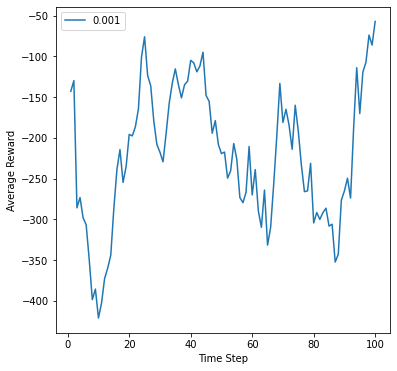

Curr counts:  [11.  0.  0.  0.]
Mean:  -105.45099864574149 0.0 206 18 16.0
Mean:  -542.4554922124371 0.01 1206 16 31.0
Mean:  -292.6449959478341 0.02 1935 10 14.0
Mean:  -189.78549761953764 0.03 2340 20 20.0
Mean:  -261.99149662605487 0.04 2930 14 20.0
Mean:  -96.40099931950681 0.05 3282 14 12.0
Mean:  -74.59549902006984 0.06 3512 10 10.0
Mean:  -298.062995582819 0.07 4253 6 21.0
Mean:  -395.73449460277334 0.08 5253 18 37.0
Mean:  -199.48649710277095 0.09 5681 10 15.0
Mean:  -415.7724937561434 0.1 6469 76 23.0
Mean:  -302.7144961412996 0.11 7469 28 46.0
Mean:  -387.92999420664273 0.12 8469 16 30.0
Mean:  -101.31199868419208 0.13 8702 20 16.0
Mean:  -337.5929967742413 0.14 9702 16 43.0
Mean:  -284.28199697774835 0.15 10377 14 38.0
Mean:  -276.5129967345856 0.16 11081 18 31.0
Mean:  -303.5614962223917 0.17 11784 6 17.0
Mean:  -136.53849809546955 0.18 12057 10 16.0
Mean:  -51.33750110771507 0.19 12399 24 60.0
Mean:  -251.30549871595576 0.2 13399 12 61.0
Mean:  -105.72749992995523 0.21 138

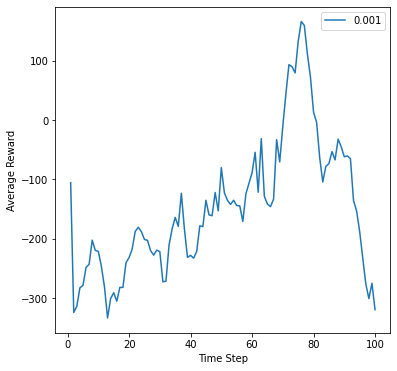

Curr counts:  [13.  0.  0.  0.]
Mean:  -668.3509889617562 0.0 1000 8 9.0
Mean:  -232.91499639418907 0.01 1416 14 8.0
Mean:  -284.21949535468593 0.02 1861 12 8.0
Mean:  -586.1419912162237 0.03 2861 15 30.0
Mean:  -421.28649594192393 0.04 3861 8 19.0
Mean:  -421.0504957991652 0.05 4861 13 14.0
Mean:  -405.461993846111 0.06 5586 14 12.0
Mean:  -198.7284972667694 0.07 5944 18 20.0
Mean:  1.922499612905085 0.08 5982 14 12.0
Mean:  -336.86549675790593 0.09 6907 6 21.0
Mean:  -183.73649831535295 0.1 7367 6 17.0
Mean:  -303.12499591801316 0.11 8024 10 24.0
Mean:  -391.06799470004626 0.12 9024 18 38.0
Mean:  -282.3909964906052 0.13 9658 10 6.0
Mean:  -182.76499727880582 0.14 9970 12 5.0
Mean:  -192.72399719199166 0.15 10401 8 8.0
Mean:  -301.72699667559937 0.16 11401 10 44.0
Mean:  -110.3119987519458 0.17 11698 20 12.0
Mean:  -392.2694961379748 0.18 12698 28 47.0
Mean:  -214.48549759527668 0.19 13262 16 25.0
Mean:  -374.11449645319954 0.2 14262 22 32.0
Mean:  -358.5199963916093 0.21 15262 20 68

/usr/local/lib/python3.7/dist-packages/nle/env/base.py:695: UserWarning: Warning: smooth quitting of game failed, aborting.
  warnings.warn("Warning: smooth quitting of game failed, aborting.")


Mean:  -110.06350087281317 0.69 54123 10 104.0
Mean:  56.32649744558148 0.7 55123 16 75.0
Mean:  -364.3074953686446 0.71 56123 11 45.0
Mean:  129.36849466897547 0.72 57123 15 132.0
Mean:  -248.58899680385366 0.73 57796 10 45.0
Mean:  -148.07500077411532 0.74 58796 20 115.0
Mean:  -175.83249741233885 0.75 59116 14 16.0
Mean:  -546.8944923505187 0.76 60116 16 65.0
Mean:  -430.2209949756507 0.77 61116 28 87.0
Mean:  -99.92350181262009 0.78 62116 12 79.0
Mean:  -314.91349623003043 0.79 63116 10 18.0
Mean:  -29.34300120244734 0.8 64116 14 67.0
Mean:  -147.19399960665032 0.81 65116 22 74.0
Mean:  -363.88299586903304 0.82 66116 8 82.0
Mean:  -40.64300093706697 0.83 67116 10 72.0
Mean:  24.10299892583862 0.84 68116 8 34.0
Mean:  -166.0214989320375 0.85 69116 6 22.0
Finished Maze!
Mean:  145.43449447699822 0.86 69434 28 122.0
Mean:  236.55498983478174 0.87 70434 28 248.0
Mean:  303.1914876883384 0.88 71434 22 288.0
Mean:  31.233494866173714 0.89 72434 16 179.0
Mean:  -275.449997986434 0.9 73434

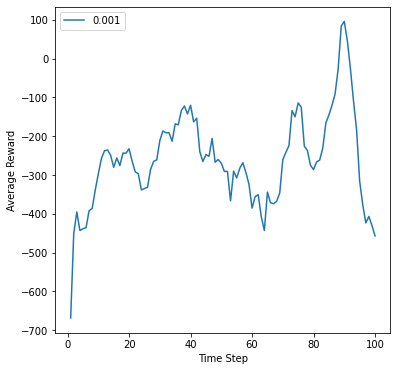

Curr counts:  [4. 0. 0. 0.]


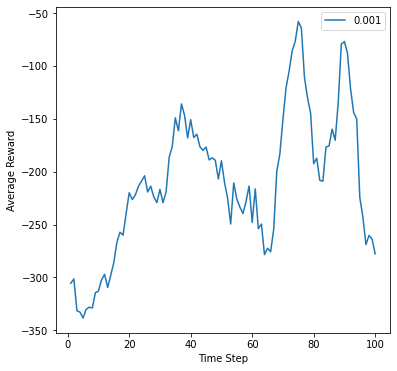

All counts: [28.  0.  0.  0.]


In [ ]:
avged_rewards3, all_counts3 = get_avg_reward_for_multiple_runs()
acc_rew_avg3 = averaged_rewards_with_sliding_window(avged_rewards3)
plot_graphs([acc_rew_avg3], ["0.001"])
print("All counts:", all_counts3)

Mean:  -311.4409983474761 0.0 1000 9 27.0
Mean:  -191.44050012435764 0.005 2000 4 19.0
Mean:  -191.78850079188123 0.01 3000 10 35.0
Mean:  -54.73400338180363 0.015 4000 16 86.0
Mean:  -37.520504120970145 0.02 5000 76 96.0
Mean:  -144.05300426506437 0.025 6000 76 41.0
Mean:  -53.02800248982385 0.03 7000 14 76.0
Mean:  6.1239931946620345 0.035 8000 76 137.0
Mean:  56.89199414616451 0.04 9000 16 144.0
Finished Maze!
Mean:  58.6089974520728 0.045 9100 27 61.0
Mean:  242.51198914460838 0.05 10100 28 249.0
Mean:  107.00299310218543 0.055 11100 18 177.0
Mean:  -101.31350470241159 0.06 12100 76 67.0
Mean:  259.5824871866498 0.065 13100 28 308.0
Mean:  137.2604921516031 0.07 14100 28 199.0
Mean:  111.06899249297567 0.075 15100 28 182.0
Finished Maze!
Mean:  231.12398902792484 0.08 16002 28 259.0
Mean:  161.86249280488119 0.085 17002 29 173.0
Mean:  242.42549011437222 0.09 18002 19 233.0
Mean:  -186.5175038385205 0.095 19002 76 31.0
Mean:  177.76549254264683 0.1 20002 26 178.0
Mean:  173.1979925

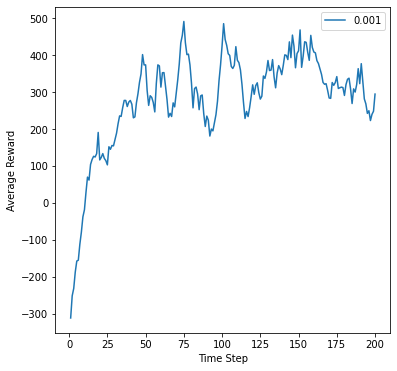

Curr counts:  [116.   0.   0.   0.]


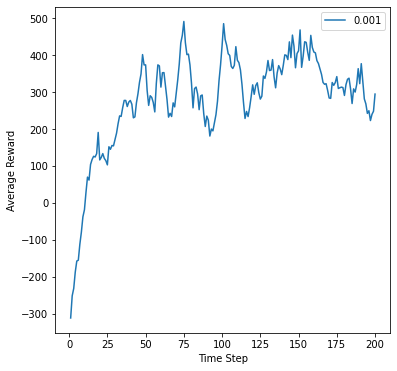

All counts: [116.   0.   0.   0.]


In [59]:
avged_rewards5, all_counts5 = get_avg_reward_for_multiple_runs()
acc_rew_avg5 = averaged_rewards_with_sliding_window(avged_rewards5)
plot_graphs([acc_rew_avg5], ["0.001"])
print("All counts:", all_counts5)

Mean:  -453.44499260466546 0.0 1000 6 12.0
Mean:  -147.9554976518266 0.01 1327 5 4.0
Mean:  -290.11999523756094 0.02 1795 12 6.0
Mean:  -196.4894968555309 0.03 2224 12 8.0
Mean:  -75.37999886786565 0.04 2394 10 6.0
Mean:  -405.1789951417595 0.05 3212 8 12.0
Mean:  -487.9904919494875 0.06 4212 8 9.0
Mean:  -167.1599972494878 0.07 4550 15 4.0
Mean:  -148.98449765401892 0.08 4885 6 6.0
Mean:  -145.1519977732096 0.09 5335 4 10.0
Mean:  -385.7084942536894 0.1 6335 18 21.0
Mean:  -46.72499932581559 0.11 6471 16 4.0
Mean:  -45.572999520460144 0.12 6855 6 10.0
Mean:  -141.35399789526127 0.13 7187 11 9.0
Mean:  -316.5329960354138 0.14 8022 12 19.0
Mean:  -25.016499779419973 0.15 8319 7 7.0
Mean:  -248.8259966650512 0.16 9319 16 21.0
Mean:  -119.6669987870846 0.17 10319 6 23.0
Mean:  -33.405999776674435 0.18 10593 6 12.0
Mean:  -84.21449898229912 0.19 10850 8 11.0
Mean:  -262.6334961222019 0.2 11710 19 21.0
Mean:  -98.96199859841727 0.21 11896 14 5.0
Mean:  -243.91749640530907 0.22 12896 12 23.0

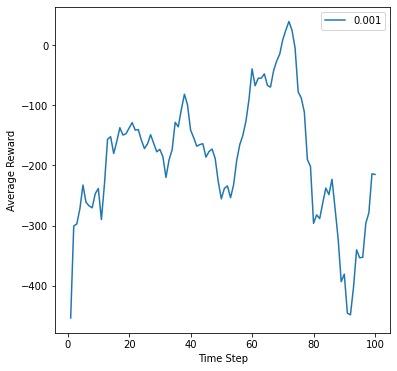

Curr counts:  [3. 0. 0. 0.]


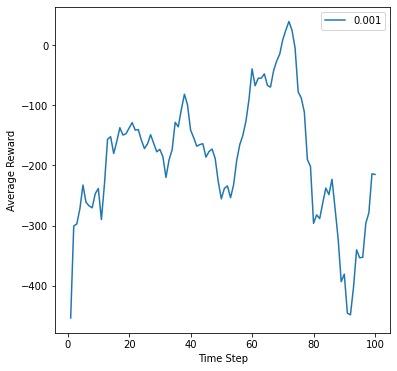

All counts: [3. 0. 0. 0.]


In [48]:
avged_rewards4, all_counts4 = get_avg_reward_for_multiple_runs()
acc_rew_avg4 = averaged_rewards_with_sliding_window(avged_rewards4)
plot_graphs([acc_rew_avg4], ["0.001"])
print("All counts:", all_counts4)